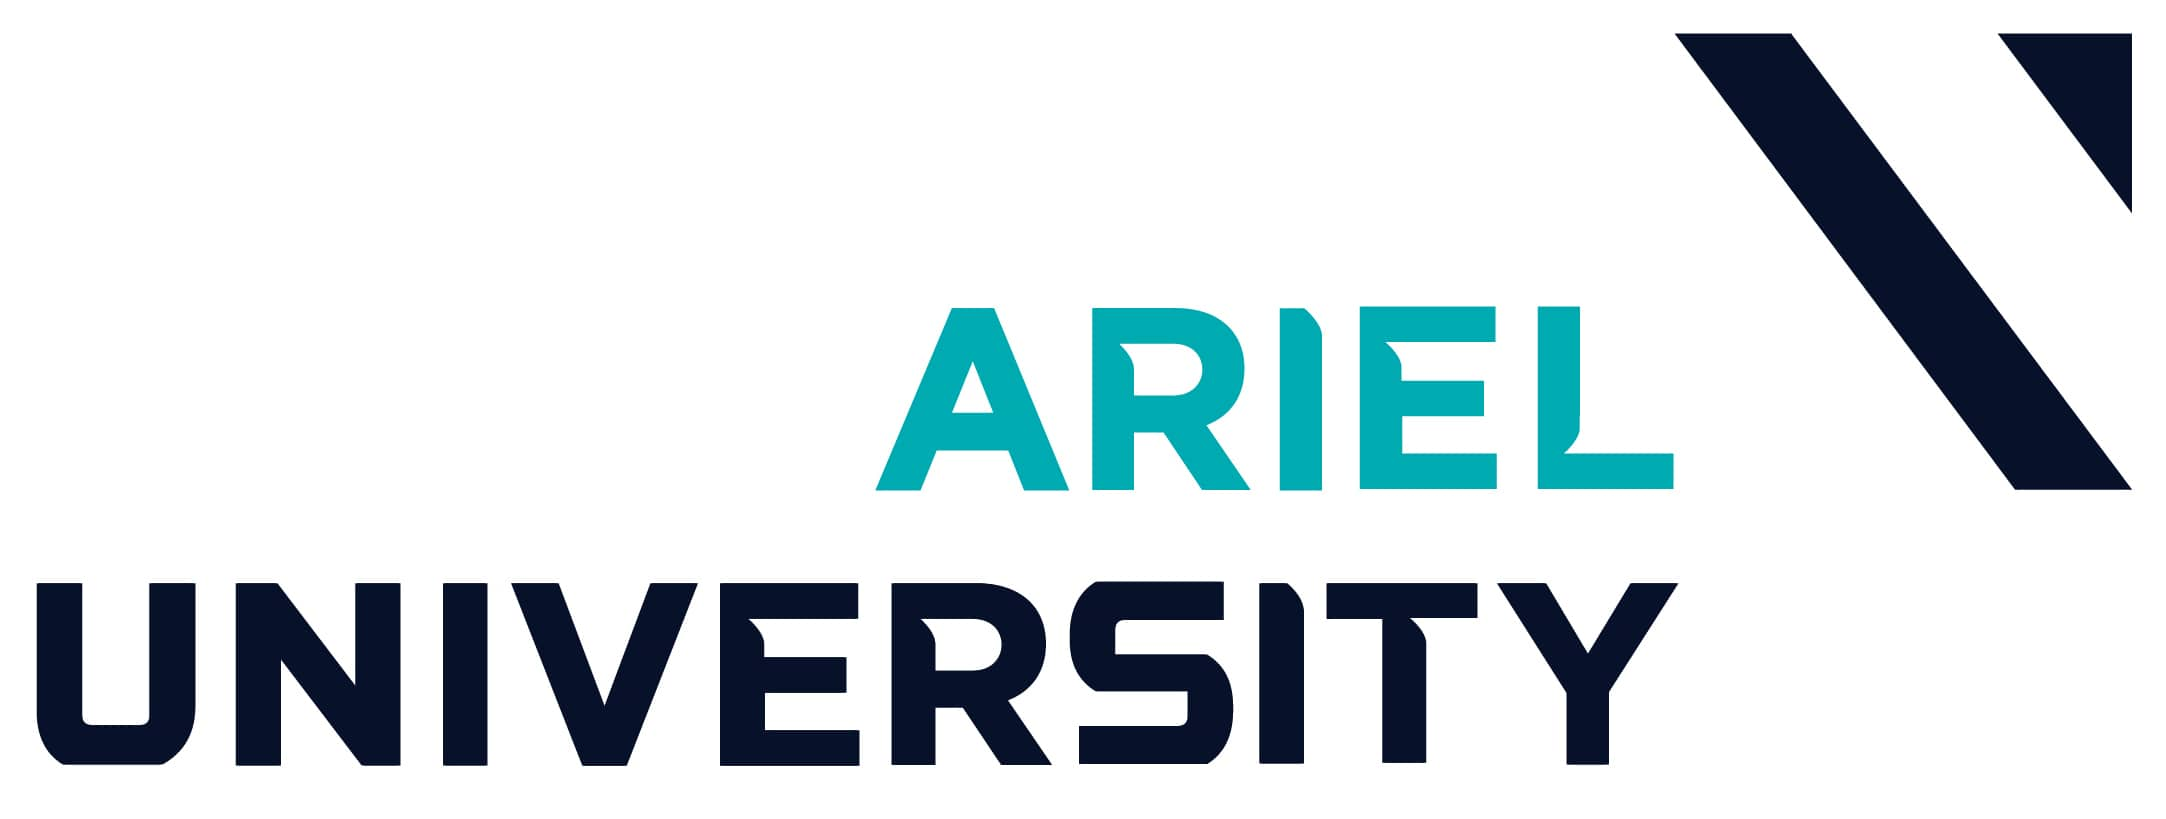

In [1]:
from IPython import display
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

#### Presented by:


* Leor Neuman
* 
* 

# Source: 
kaggle:"https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset"

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [138]:
url='https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv'
df=pd.read_csv('https://raw.githubusercontent.com/hhneuman/Data-Analisys/main/Sleep_health_and_lifestyle_dataset.csv')
sleep_df=df.copy()

In [139]:
sleep_df=sleep_df.rename(columns={"Person ID": "Person_ID",
                         "Sleep Duration": "Sleep_Duration",
                         'Quality of Sleep': 'Quality_of_Sleep',
                         'Physical Activity Level': 'Physical_Activity_Level',
                         'Stress Level': 'Stress_Level', 
                         'BMI Category': 'BMI_Category', 
                         'Blood Pressure': 'Blood_Pressure',
                         'Heart Rate': 'Heart_Rate',
                         'Daily Steps': 'Daily_Steps',
                         'Sleep Disorder': 'Sleep_Disorder'})

In [140]:
sleep_df

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [141]:
sleep_df['Sleep_Disorder'].head(20)

0            None
1            None
2            None
3     Sleep Apnea
4     Sleep Apnea
5        Insomnia
6        Insomnia
7            None
8            None
9            None
10           None
11           None
12           None
13           None
14           None
15           None
16    Sleep Apnea
17    Sleep Apnea
18       Insomnia
19           None
Name: Sleep_Disorder, dtype: object

In [142]:
sleep_df['BMI_Category']=sleep_df['BMI_Category'].replace('Normal Weight','Normal')

In [143]:
sleep_df['BMI_Category']=sleep_df['BMI_Category'].replace(['Normal','Overweight','Obese'],[1,2,3])
sleep_df[['BMI_Category']].head(10)

,BMI_Category
0,2
1,1
2,1
3,3
4,3
5,3
6,3
7,1
8,1
9,1


In [239]:

for i in sleep_df['Heart_Rate']:
    if i>80:
        sleep_df=sleep_df.replace(i,'80+')
    if i>75 and i<=80:
        sleep_df=sleep_df.replace(i,'75-80')
    if i>70 and i<=75:
        sleep_df=sleep_df.replace(i,'70-75')
    if i>65 and i<=70:
        sleep_df=sleep_df.replace(i,'65-70')
    if i<65:
        sleep_df=sleep_df.replace(i,'Lower then 65')
        
    
sleep_df['Heart_Rate'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      75-80
1      70-75
2      70-75
3        80+
4        80+
       ...  
369    65-70
370    65-70
371    65-70
372    65-70
373    65-70
Name: Heart_Rate, Length: 374, dtype: object>

In [145]:
grouped_df1 = sleep_df.groupby(['Occupation',
                                'Gender',
                                'Sleep_Disorder'])[['Quality_of_Sleep',
                                                    'Stress_Level',
                                                    'Age',
                                                    'Blood_Pressure',
                                                    'Physical_Activity_Level',
                                                    'Sleep_Duration',
                                                    'Heart_Rate',
                                                    'Daily_Steps',
                                                    'BMI_Category']].max()
grouped_df1

Quality_of_Sleep  Stress_Level  \
Occupation           Gender Sleep_Disorder                                   
Accountant           Female Insomnia                       8             7   
                            None                           9             6   
                     Male   None                           8             6   
Doctor               Female None                           9             3   
                     Male   Insomnia                       7             8   
                            None                           7             8   
                            Sleep Apnea                    9             8   
Engineer             Female Insomnia                       9             3   
                            None                           9             3   
                     Male   Insomnia                       8             7   
                            None                           8             7   
                            Sleep Apnea                    8             5   
Lawyer               Female None                           7             6   
                            Sleep Apnea                    7             5   
                     Male   Insomnia                       8             5   
                            None                           8             6   
                            Sleep Apnea                    8             5   
Manager              Female None                           7             5   
Nurse                Female Insomnia                       6             8   
                            None                           9             8   
                            Sleep Apnea                    9             8   
Sales Representative Male   Sleep Apnea                    4             8   
Salesperson          Male   Insomnia                       6             7   
                            None                           6             7   
                            Sleep Apnea                    6             7   
Scientist            Female None                           6             6   
                            Sleep Apnea                    4             8   
Software Engineer    Male   Insomnia                       4             8   
                            None                           8             6   
Teacher              Female Insomnia                       7             6   
                            None                           8             4   
                            Sleep Apnea                    8             7   
                     Male   Insomnia                       6             7   
                            None                           7             5   
                            Sleep Apnea                    5             7   

                                            Age Blood_Pressure  \
Occupation           Gender Sleep_Disorder                       
Accountant           Female Insomnia         52         130/85   
                            None             40         119/77   
                     Male   None             32         118/76   
Doctor               Female None             56         118/75   
                     Male   Insomnia         48         142/92   
                            None             33         125/80   
                            Sleep Apnea      49         139/91   
Engineer             Female Insomnia         53         125/80   
                            None             54         125/80   
                     Male   Insomnia         44         132/87   
                            None             43         130/85   
                            Sleep Apnea      43         130/85   
Lawyer               Female None             39         128/85   
                            Sleep Apnea      38         135/88   
                     Male   Insomnia         41         130/85   
                            None   

<AxesSubplot:>

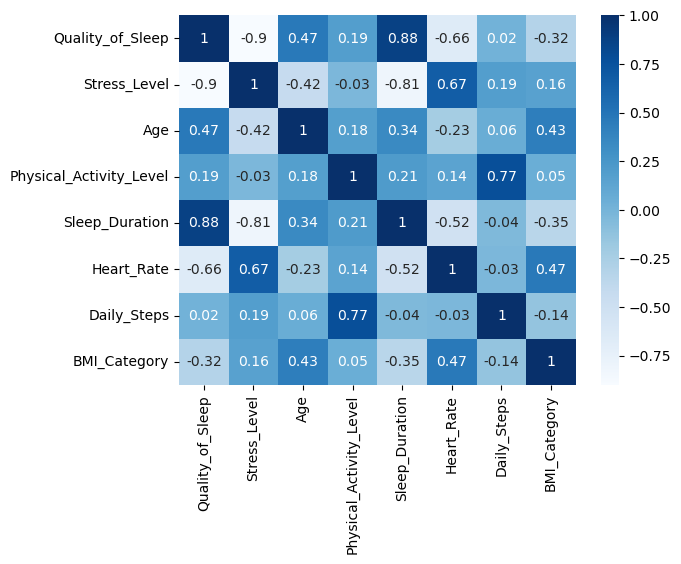

In [146]:
features=['Quality_of_Sleep','Stress_Level','Age','Blood_Pressure','Physical_Activity_Level','Sleep_Duration','Heart_Rate','Daily_Steps','BMI_Category']
correlation_matrix = sleep_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

In [174]:
disorder_df=sleep_df['Sleep_Disorder']
disorder_df=disorder_df.value_counts().to_frame()
insomnia= disorder_df.loc[disorder_df.Sleep_Disorder == 'Insomnia'].value_counts()
non= disorder_df.loc[disorder_df.Sleep_Disorder == 'None'].value_counts()
anpea=disorder_df.loc[disorder_df.Sleep_Disorder == 'Sleep Anpea'].value_counts()
disorder_df=disorder_df.rename(columns={"":"value"})
disorder_df=disorder_df.rename(columns={'Sleep_Disorder':'Val','':'Disorder'})
disorder_df


,Val
None,219
Sleep Apnea,78
Insomnia,77


In [189]:
disorder_df=disorder_df.transpose()
disorder_df

,None,Sleep Apnea,Insomnia
A,219,78,77


In [192]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data = disorder_df[disorder_df.None == 'A'], x = 'None', ax = ax[0])
sns.histplot(data = disorder_df[disorder_df.Sleep_Disorder == 'Sleep Apnea'], x = 'Sleep_Disorder', ax = ax[1])
sns.histplot(data = disorder_df[disorder_df.Sleep_Disorder == 'Insomnia'], x = 'Sleep_Disorder', ax = ax[2])

plt.show()

SyntaxError: invalid syntax (2113684781.py, line 4)

In [ ]:
plt.figure(1, figsize=(5,5))
plt.title("Sleep Disorder")
sleep_df['Sleep Disorder'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("") 
plt.show()

In [ ]:
grouped_df2 = sleep_df.groupby('Sleep Disorder')[['Quality of Sleep','Stress Level','Age','Blood Pressure','Physical Activity Level','Sleep Duration','Heart Rate','Daily Steps','BMI Category']]

<AxesSubplot:ylabel='Sleep Disorder-None'>

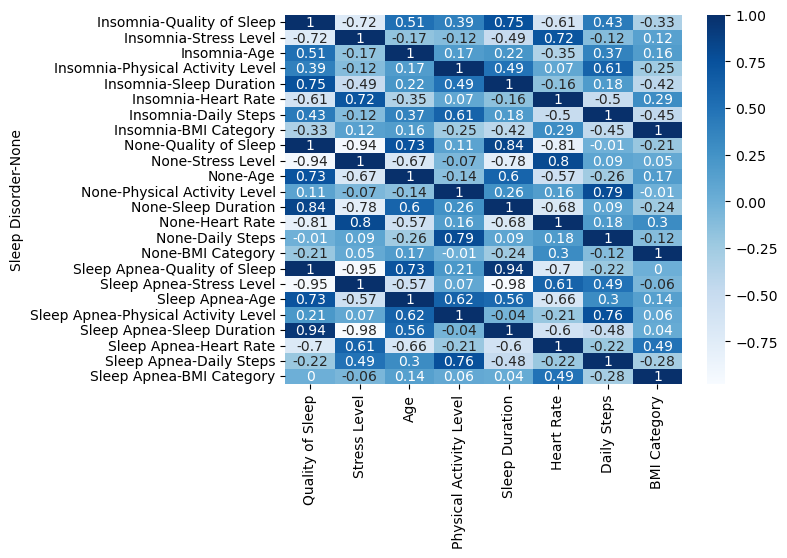

In [183]:
correlation_matrix2 = grouped_df2.corr().round(2)
sns.heatmap(data=correlation_matrix2,cmap='Blues', annot=True)

<AxesSubplot:ylabel='Heart_Rate-None'>

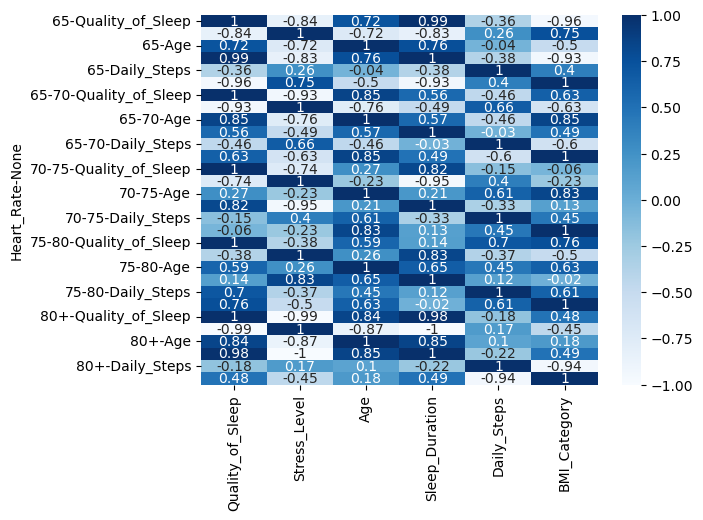

In [241]:
#'Blood Pressure'
grouped_df4 = sleep_df.groupby('Heart_Rate')[['Quality_of_Sleep','Stress_Level','Age','Physical_Activity_Level','Sleep_Duration','Daily_Steps','BMI_Category']]
correlation_matrix4 = grouped_df4.corr().round(2)
sns.heatmap(data=correlation_matrix4,cmap='Blues', annot=True)

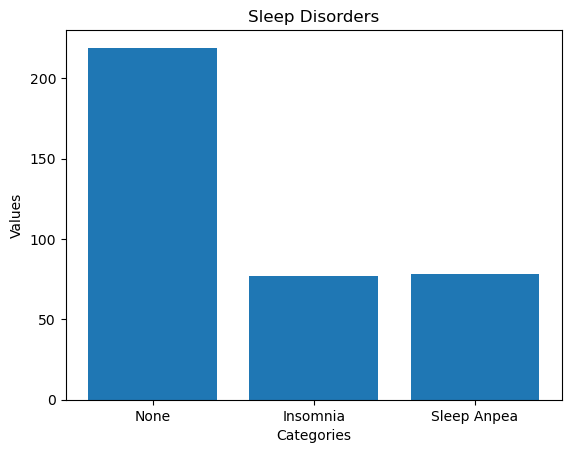

In [198]:
Categories=['None','Insomnia','Sleep Anpea']
Values=[219,77,78]
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sleep Disorders')
plt.show()

Ideas:
1.Stress-Sleep Quality
2.Sleep-BMI
3.Occ-Sleep Dur/Qua*
4.Occ+Stress-Sleep Dur/Qua
5.Disorder(Insomnia)+Stress-Sleep Qua
6.Age+Stress-Sleep Dur/Qua
7.Sleep Dur Compared to Physical Activiry and Sleep Quality*
8.Gender+Occ-Sleep Qua*
9.Occ+Sleep Dur-Sleep Qua
10.

In [202]:
grouped_df3 = sleep_df.groupby(['Occupation',
                                'Stress_Level'])[['Quality_of_Sleep','Sleep_Duration']]


In [ ]:
plt.figure(figsize=(2,5))
g = sns.boxplot(data = [['Age']])

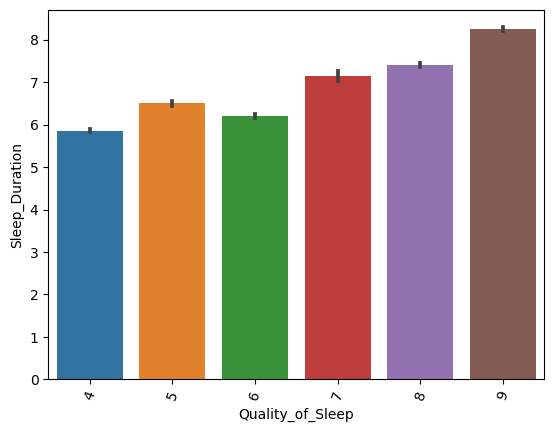

In [203]:
sns.barplot(data = sleep_df, x='Quality_of_Sleep', y='Sleep_Duration')
plt.xticks(rotation=70)
plt.show()

The graph is devided into